# Analysis and visualisation: Titanic

The goal of this project is to investigate whether there are some correlations between the different aspects of physical and financial parameters and the survival rates of the Titanic passengers.

## Data Investigation

The dataset `titanic.csv` is pre-cleaned codecademy dataset, that contains information about passengers on the Titanic, including the amount they paid for their fare and whether or not they survived (note: this is a subset of the full data available). 

Columns description:

- `PassengerId`: passenger identification number;
- `Survived`: binary code, that denotes whether a passenger survived (`1` - "Yes") or not (`0` - "No").
- `Pclass`: passenger class: `1` - 1st, `2` - 2nd, `3` - 3rd;
- `Name`: passenger name;
- `Sex`: passenger sex;
- `Age`: passenger age;
- `SibSp`: number of siblings/ spauses aboard;
- `Parch`: number of parants/ children aboard;
- `Ticket`: ticket number;
- `Fare`: passenger fare (£);
- `Cabin`: cabin number;
- `Embarked`: port of embarcation (`C`- Cherbourg, `S`- Southampton,`Q`- Queenstown  )

First, let's import necessary libraries and upload `titanic.csv` to `titanic` variable. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
867,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
868,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
869,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Let's check data types of each column. 

In [2]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Result: columns contain quantitative (designated as integers or floating point numbers) and categorical variables. 

What about `NaN` values, how many are there in each column? 

In [3]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          684
Embarked         2
dtype: int64

Looks like absent values, designates as `NaN`, are dominant in `Cabin` column and have a quite big part of `Age` column.

Let's see brief automatic statistics available for quantitative variables.

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,871.000000,871.000000,871.000000,696.000000,871.000000,871.000000,871.000000
mean,445.319173,0.376579,2.338691,29.661164,0.517796,0.366246,26.530170
std,257.761917,0.484806,0.821469,14.571894,1.101448,0.792325,29.351184
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.862500
75%,665.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


Result: Almost all columns except age contain 871 data ponts. Min Fare `0` looks suspicious. Let's find who were those passengers who paid zero cents to be on board. 

In [5]:
titanic[titanic.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
176,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
259,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
273,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
297,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
404,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
456,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
471,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
585,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
621,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Result: they were all males from different Tickets Classes and none of them survived. There are blanks in the info about their cabins and all of them embarked in one town - Southampton. 

Let's find who in general paid less than 7 pounds of fare for their tickets. 

In [6]:
lowest_fare = titanic[titanic.Fare < 7]
len(lowest_fare)

28

Seems that there are only 28 people who paid a low price or not paid at all? 

In [7]:
lowest_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
126,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
140,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q
176,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
199,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
259,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
267,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
273,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
297,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
320,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
364,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


Result: 

- There is only one female around those who paid the lowest prices. 

- These people embarked from different towns, but still mostly from Southampton. 

- There are many people from 1st and 2nd Ticket Classes who paid disproportionally low price for their ticket, what looks very strange. 

- Other data is mostly present so it's hard to say without extensive research what these low fares could mean for people from the 1st and 2nd Classes, or no fares at all for different Classes. 


## Visualisation of Survived Column via Pie Chart


Let's continue our investigation and find out how many people survived and how many died, at least, according to this dataset.  

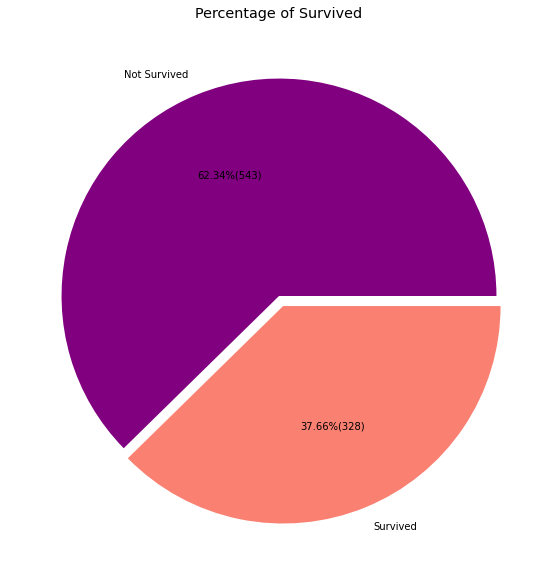

In [8]:
values = titanic['Survived'].value_counts() 
explode = [0, 0.05]
# Prepare figure
plt.figure(figsize = (15,10))
# Draw pie chart
plt.pie(
    values, 
    labels=['Not Survived', 'Survived'],
    autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100) * values.sum()), 
    explode=explode,
    colors= ['purple','salmon'])

plt.title('Percentage of Survived', fontsize = 'x-large')

plt.show()

Result: 
- Only 37.66% percent, or 328 people, who were on board had managed to survive. 
- 543 people had died.

Now let's calculate the difference in mean fare paid by those who survived and those who died. 

In [9]:
mean_fare_survived = titanic.groupby('Survived').Fare.mean()
mean_fare_survived

Survived
0    19.720801
1    37.802998
Name: Fare, dtype: float64

Result: Those who survived paid higher average fare. 

What about the difference in median fare for those who survived and those who died?

In [10]:
median_fare_survived = titanic.groupby('Survived').Fare.median()
median_fare_survived

Survived
0    10.4625
1    26.0000
Name: Fare, dtype: float64

Result: Meadian value of `Fare` is also higher for those who survived.

## Visualisation of Fares via Box Plots

Now let's visualise this info on side-by-side box plots of fares by survival. Median will be shown as a quartile line and mean as `+`.

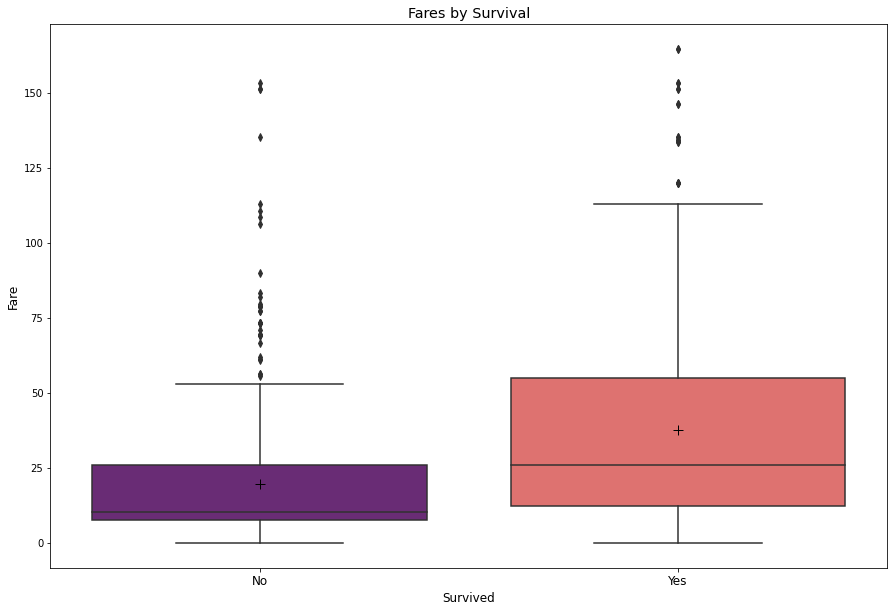

In [11]:
# Prepare figure
plt.figure(figsize = (15,10))
# Draw boxplot
ax = sns.boxplot(x= titanic.Survived, 
    y= titanic.Fare,
    palette='magma', 
    showmeans=True,
    meanprops={"marker": "+",
        "markeredgecolor": "black",
        "markersize": "10"})
# Add descriptions
ax.set_title('Fares by Survival', fontsize = 'x-large')
ax.set_xlabel('Survived', fontsize = 'large')
ax.set_ylabel('Fare', fontsize = 'large')
ax.set_xticklabels(['No', 'Yes'], fontsize = 'large')

plt.show()

Result: 
Mean is higher on the `Fare` scale than median, both for dead and survived. Usually this indicates that the data is right skewed by outliers. 

## Visualisation of Fares via Histogram

Let's create overlapping histograms of fares by survival to check it. 

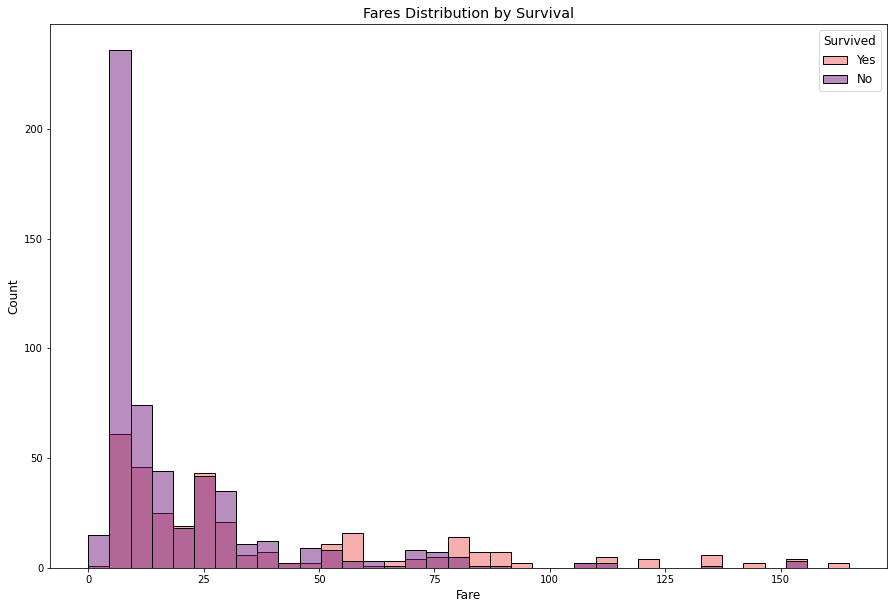

In [16]:
# Prepare figure
plt.figure(figsize = (15,10))
# Draw hisplot
ax = sns.histplot(titanic, x=titanic.Fare, hue=titanic.Survived, stat="count", legend=False, palette='magma')

# Add descriptions
ax.set_title('Fares Distribution by Survival', fontsize = 'x-large')
ax.set_xlabel('Fare', fontsize = 'large')
ax.set_ylabel('Count', fontsize = 'large')

plt.legend(title='Survived', title_fontsize='large', loc='upper right', labels=['Yes', 'No'], fontsize = 'large')
plt.show()


It is indeed skewed in both cases, especially on the histogram that describes statistics of those who not survived. 

## Visualisation of Correlations via Heatmap 

Finally, we are going to look at the correlation matrix visualised as a heatmap to understand what other tendencies these dataset contains.

In [13]:
def visualise_heatmap(dataset_corr, corr_objects):
    # Prepare figure
    plt.figure(figsize = (21,12))

    # Draw heatmap as triangle
    mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
    # Add descriptions
    plt.title(' Correlations of ' + corr_objects, fontsize= 'x-large')
    plt.xticks(rotation=45)

    # Plot heatmap
    heatmap = sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, cmap='magma', mask=mask)
    return heatmap

<AxesSubplot:title={'center':' Correlations of different parameters of Titanic passengers'}>

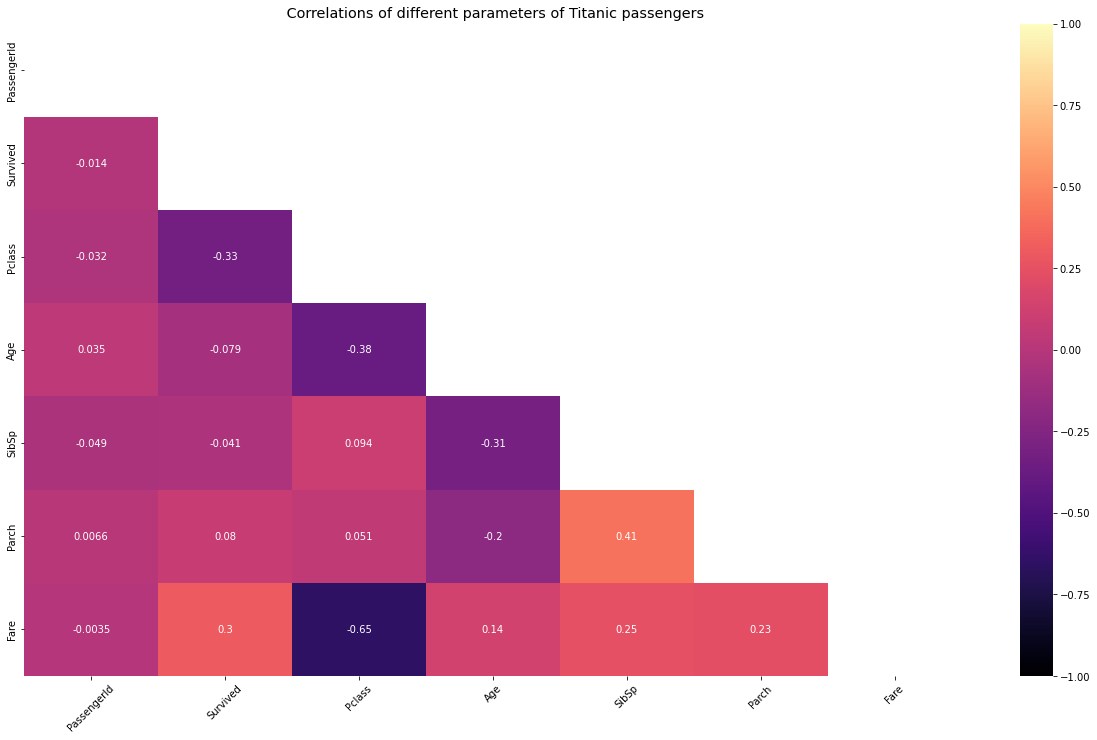

In [14]:
visualise_heatmap(titanic.corr(), 'different parameters of Titanic passengers') 

## Conclusion:

- In general, there are more survivors, with minor exceptions, among those who could afford to pay higher fares.

- Among those, who had tickets with a price a bit higher than the cheapest ones, the difference in the number of survivors is especially dramatic: almost 250 died and only around 60 survived. 

- Almost all, who had the cheapest tickets, died. And even though the negative correlation (`-0.33`) between `PClass` and `Survived` columns, as well as positive correlation (`0.3`) between `Fare` and `Survived` are not very significant it, nevertherless, confirms the initial statement: those who had higher Ticket Class had more chances of survival.

- The most significant negative correlation (`-0.65`) is between `Fare` and `PClass`, meaning the lower the Ticket Class the lower the price for it. That is quite obvious but in case of "Titanic", it seems, that this difference was especially drastic. 

- There is significant negative correlation (`-0.38`) between `PClass` and `Age`, which, from one perspective, means there were generally more younger people and children among people with lower Ticket Classes; from the other - it is logical to suspect, that among people of the 1st class could have been more elderly than among those who had Tickets of the lower Classes. 

- The last significant, but this time, positive correlation (`0.41`) exists between `Parch` (Parents or children) and `SibSp` (Siblings or Spauses). This correlation, basically, means that people were traveling with their families which, in many cases, might consist of quite many members. 